In [71]:
# Segundo parcial
# Melannie Aranza Mart√≠nez Velasco 
# Modelos Computacionales II

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.io import loadmat
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [73]:
## Usar los m√©todos de ML no supervisado en: (k-means, Gaussian mixture, cluster jer√°rquico)

In [74]:
### Data set de Coactivation Matrix

In [75]:
mat_path = r'C:\Users\melan\OneDrive\Documentos\Escuela\Modelos computacionales\Coactivation_matrix (2).mat'
data = scipy.io.loadmat(mat_path)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])

In [76]:
coactivation_matrix = data['Coactivation_matrix']
coactivation_matrix.shape, coactivation_matrix[:5, :5]

((638, 638),
 array([[0.        , 0.16071429, 0.11148649, 0.        , 0.13809524],
        [0.16071429, 0.        , 0.06825939, 0.        , 0.04205607],
        [0.11148649, 0.06825939, 0.        , 0.22419929, 0.        ],
        [0.        , 0.        , 0.22419929, 0.        , 0.        ],
        [0.13809524, 0.04205607, 0.        , 0.        , 0.        ]]))

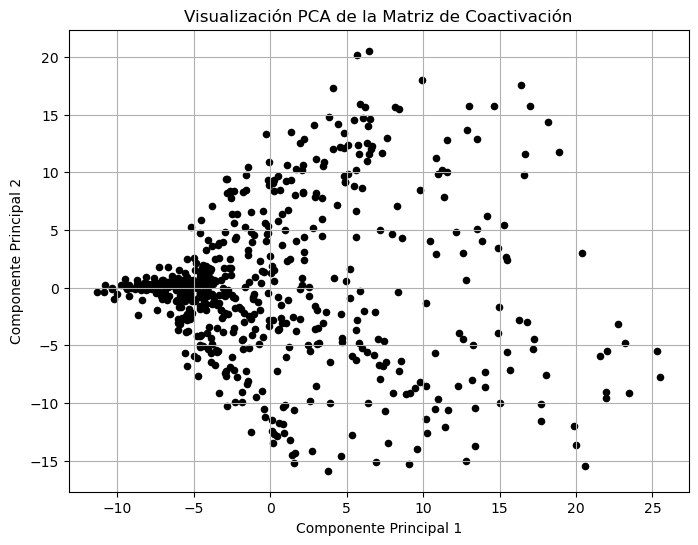

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(coactivation_matrix)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=20, color='black')
plt.title('Visualizaci√≥n PCA de la Matriz de Coactivaci√≥n')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [78]:
#### Utilizar el m√©todo de codo para determinar el n√∫mero de cluster √≥ptimo (adecuado)
#### Usando el n√∫mero de clusters encontrado por el m√©todo del codo, usar k-means y gaussian mixture en este dataset 


C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


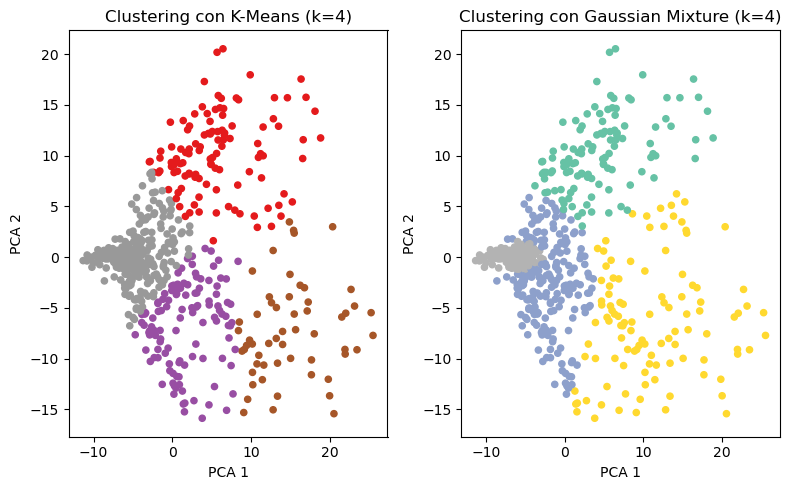

In [79]:
# K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Gaussian Mixture Model con k=4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# K-Means
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=20)
axs[0].set_title('Clustering con K-Means (k=4)')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')

# Gaussian Mixture
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set2', s=20)
axs[1].set_title('Clustering con Gaussian Mixture (k=4)')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [80]:
#### me trab√© aqu√≠ y lo empec√© a hacer de otra forma

In [81]:
### M√©todo del codo -> encontrar n√∫mero √≥ptimo de clusters

In [82]:
# Convertir matriz-> vectores por fila (Para el Clustering)
X = coactivation_matrix

In [83]:
# Calcular Inertia para diferentes valores de k
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

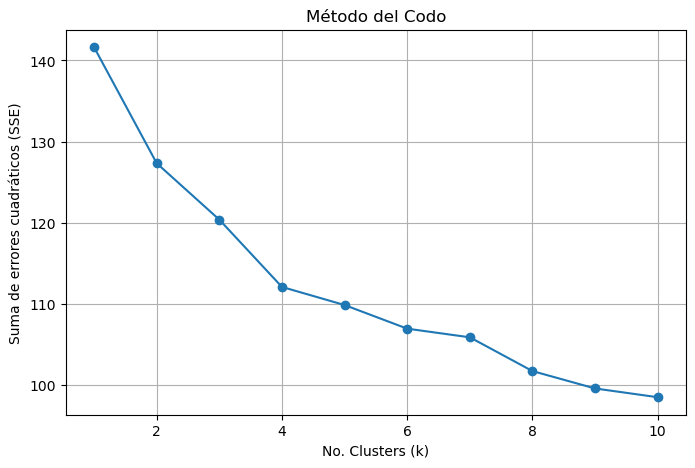

In [84]:
# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('No. Clusters (k)')
plt.ylabel('Suma de errores cuadr√°ticos (SSE)') # Inertia
plt.title('M√©todo del Codo')
plt.grid(True)
plt.show()

#### K-Means
- Aplicar algoritmo sobre los vectores de coactivaci√≥n (cada fila como una instancia)->
- Se asign√≥ 638 en 3 grupos. Se asume que los clusters son aprox. esf√©ricos y de varianza similar (puede ser bueno para verificaci√≥n inicial).

In [86]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
print("K-Means labels:", kmeans_labels[:10]) # Ver los primeros resultados

K-Means labels: [1 1 1 1 1 1 1 0 1 1]


C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### Gaussian Mixture Model (GMM)
Se asumen los datos tienen una mezcla de distribuciones gaussianas (es m√°s flexible y puede capturar relaciones m√°s complejas)

In [88]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X)
print("GMM labels:", gmm_labels[:10])

C:\Users\melan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GMM labels: [1 1 1 1 1 1 1 0 1 1]


In [89]:
# Visualizaci√≥n- reducir a 2 dimensiones utilizando PCA
# Para ver la distribuci√≥n de puntos seg√∫n las etiquetas asignadas por cada m√©todo -ver estructura supuesta por cada modelo-)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Text(0.5, 1.0, 'K-Means Clustering (k=3)')

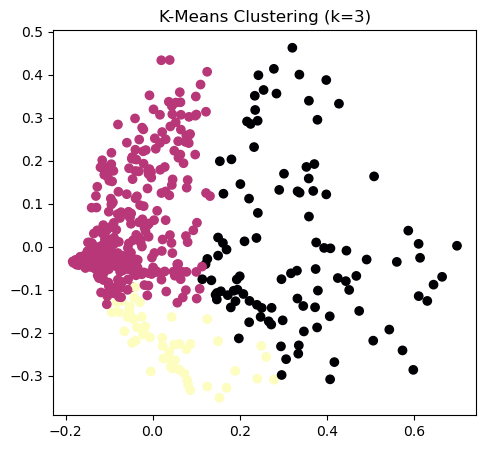

In [90]:
# Plot K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='magma')
plt.title("K-Means Clustering (k=3)")

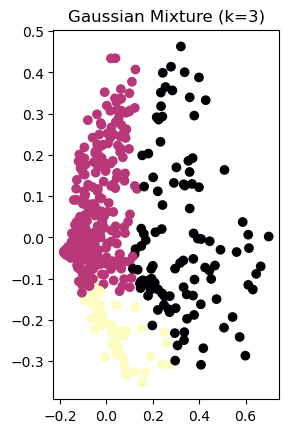

In [91]:
# Plot GMM
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='magma')
plt.title("Gaussian Mixture (k=3)")
plt.show()

# Parte II: Brain tumor
* Utilizar el m√©todo de codo para determinar el n√∫mero de cluster √≥ptimo (adecuado)
* Utilizar 2 cluster con cada m√©todo (k-means, gaussian clusters y cluster jer√°rquico) y calcular la matriz de confusi√≥n de cada m√©todo usando la columna 'Class' como groundthruth
* ¬øQu√© m√©todo recomendar√≠as para este dataset?, ¬øpor qu√©?

In [93]:
##%%
# Cargar dataset
path_bt = r"C:\Users\melan\OneDrive\Documentos\Escuela\Modelos computacionales\Brain Tumor.csv"
df = pd.read_csv(path_bt) # Definir path
df.head() # Primeros valores

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [94]:
# Excluir columnas no num√©ricas (porque no aportan nada) y la columna 'Class' para el clustering
X = df.drop(columns=["Image", "Class"])

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_true = df["Class"].values # Guardar variable y etiquetas verdaderas
X.shape, X_scaled[:3] # Mostrar dimensiones y datos normalizados

((3762, 13),
 array([[-5.15700406e-001, -1.95790086e-001, -3.31438025e-002,
          5.04650142e-001,  6.78552579e-002, -9.72667778e-002,
         -2.68050200e-001,  6.85118050e-001,  4.70073392e-001,
          4.04099833e-001, -1.21708574e-001,  1.00071256e+000,
         -1.11785692e-168],
        [-1.29018130e-001,  2.02943099e-001,  3.65594000e-001,
          2.74604991e+000, -1.50203606e-001, -1.75880525e-001,
         -5.85492224e-001,  2.09028734e+000,  2.86558024e+000,
          1.34545658e+000, -7.99180836e-001,  1.26437684e+000,
         -1.11785692e-168],
        [-3.75012617e-001,  9.25765400e-001,  9.84679519e-001,
         -1.02670752e+000,  3.74530866e-001,  3.70475637e-002,
         -4.21009579e-001, -1.33598137e+000, -9.88339974e-001,
         -1.64939073e+000,  6.93704391e-001,  8.50635907e-001,
         -1.11785692e-168]]))

In [96]:
# Verificar
print("Media post-normalizaci√≥n:", np.mean(X_scaled, axis=0)) # Media de cada columna debe ser 0 aprox.
print("Desviaci√≥n est√°ndar post-normalizaci√≥n:", np.std(X_scaled, axis=0)) # Desviaci√≥n est√°ndar de cada columna debe ser 1 aprox.

Media post-normalizaci√≥n: [ 1.43543987e-016 -1.28434094e-016  2.94642921e-016 -1.81318720e-016
  9.82143069e-017 -7.55494669e-018  7.55494669e-017 -9.06593602e-017
  3.02197867e-017 -4.23077014e-016  1.20879147e-016  3.21085234e-016
 -4.72569516e-171]
Desviaci√≥n est√°ndar post-normalizaci√≥n: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


### M√©todo del Codo
- Con K-means para determinar no. √≥ptimo de clusters

In [100]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

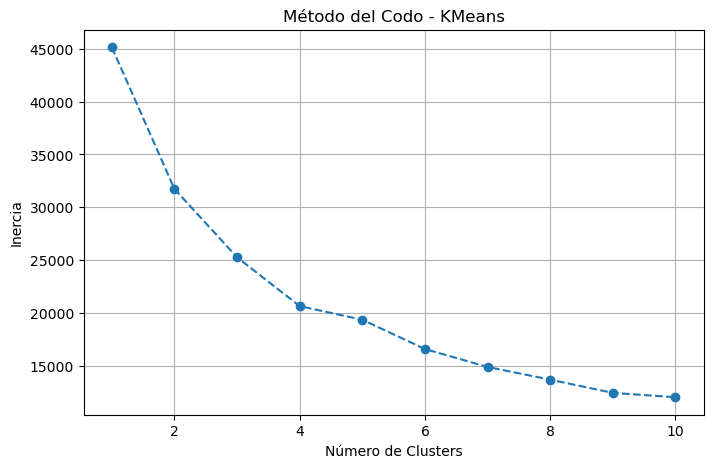

In [102]:
# Gr√°ficar
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('M√©todo del Codo - KMeans')
plt.xlabel('N√∫mero de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show() 

In [104]:
### K-means

SyntaxError: invalid character '‚âà' (U+2248) (3097161835.py, line 7)

In [106]:
from sklearn.metrics import confusion_matrix

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
cm_kmeans = confusion_matrix(df["Class"], kmeans_labels)
print("Matriz de Confusi√≥n - KMeans:\n", cm_kmeans)

Matriz de Confusi√≥n - KMeans:
 [[1978  101]
 [  80 1603]]


### Gaussian Mixture Model (GMM)
-  GMM es m√°s flexible, especialmente si los clusters tienen formas el√≠pticas o solapamiento.

In [112]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
cm_gmm = confusion_matrix(df["Class"], gmm_labels)
print("Matriz de Confusi√≥n - GMM:\n", cm_gmm)

Matriz de Confusi√≥n - GMM:
 [[2056   23]
 [  60 1623]]


### Agglomerative Clustering (Jer√°rquico) 
 Clustering jer√°rquico puede detectar estructuras m√°s complejas, pero no escala tan bien con muchos datos

In [118]:

hier = AgglomerativeClustering(n_clusters=2)
hier_labels = hier.fit_predict(X_scaled)
cm_hier = confusion_matrix(df["Class"], hier_labels)
print("Matriz de Confusi√≥n - Clustering Jer√°rquico:\n", cm_hier)

Matriz de Confusi√≥n - Clustering Jer√°rquico:
 [[  26 2053]
 [1589   94]]


# III. De su propia investigaci√≥n: m√©tricas para verificar si estuvo bien realizada la clasificaci√≥n

i√≥n

**M√©tricas para saber si el modelo clasific√≥ bien o solo se hizo el lindo**

**¬øQu√© es *precision*?**  
De todos los que el modelo dijo que eran positivos, ¬øcu√°ntos s√≠ lo eran en serio?  
+ Sirve cuando NO queremos confundir a alguien que est√° bien con alguien que est√° mal.  
+ Ej: si un test dice que tienes una enfermedad, pero est√°s sana‚Ä¶ es ser√≠a un *falo psitivo* y*precision* ayuda a evitarlos.

**¬øQu√© es *acQ  
Literal, qu√© tanto le atin√≥ el modelo en total.  
+ Cuenta todas las veces que acert√≥, sin importar lclase.  
+ Peeero si hay muchas m√°s personas sanas que enfermas (clases desbalanceadas), puede parecer que todo va bien aunque est√© fallando.

**¬øQu√© es *recall*?**  
De todos los que S√ç eran positivos, ¬øa cu√°ntos encontr√≥ el modelo?  
+ Ideal cuando no quieres que se te escape ning√∫n caso importante (como un paciente real).  
+ Reduce los *falsos negativos*, o sea, cuando alguien tiene algo pero .modelo dice que no üôÉ

**¬øQu√© es el *f1-score*?**  
Es como el equilibrio zen entre *precision* y *recall*.  
+ Si una es muy baja, el *f1* lo nota y baja tambi√©n.  
+ Es s√∫per √∫til si tienes pocos datos de una clase y necesitas ser a con eso te sientes lista? üòÑ

# Parte IV
**ro, ¬øqu√© es la matriz de confus**i√≥n?
Es una tablita que te dice cu√°ntas veces el molo **art√≥** y cu√°ntas ves **se equoc√≥**, ro **clasificando en positivo o negivinta:

|                    | **Predijo Positivo** | **Predijo Negativo** |
|--------------------|----------------------|----------------------|
| **Era Positivo**   | Verdadero Positivo (**VP**)  | Falso Negativo (**FN**)   |
| **Era Negativo**   | Falso Positivo (**FP**)       | Verdadero Negativo (* vimos:

---

### C√≥mo se conectan:

**Precision**  
‚Üí Usa: **VP / (VP + FP)**  
O sea: de todos los que el modelo dijo *‚Äús√≠ es positivo‚Äù*, ¬øcu√°ntoslmente lo eran?

---

**Recall**  
‚Üí Usa: **VP / (VP + FN)**  
O sea: de todos os que *s√≠ eran positivos*, ¬øcu√°ntos detect√≥ el modelo?  
(Si se leapan muchos, mal ah√≠.)

---

**Accuracy**  
‚Üí Usa: **(VP + VN) / Total**  
O sea: ¬øcu√°ntas vece modelo le atin√≥ en general?

---

**F1-score** 
‚Üí Usa:el romedirm√≥nico ene *precision* y *recall*  
F√≥rmula: **2 √ó (Preon √ó Recall) / (Precision + ecall**  
Sirve cuando necesitas qumgo un dibujo o infograf√≠a est√©tica con esto? üëÄ

# Parte V
A partir del resultado de 2.B (2 cluster para Brain Tumor), calcular precision, accuracy, recall y f1-score

In [124]:
# Calcular las m√©tricas mediante una funci√≥n
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def metricas(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

y_true = df['Class']  # La columna real (ground truth)
y_pred_kmeans = kmeans_labels  # Aseg√∫rate de que tenga el mismo orden que y_true
y_pred_gmm = gmm_labels
y_pred_hier = hier_labels

In [126]:
# Evaluar para cada m√©trica
print("KMeans:", metricas(y_true, y_pred_kmeans)) # KMeans
print("GMM:", metricas(y_true, y_pred_gmm)) # GMM
print("Jer√°rquico:", metricas(y_true, y_pred_hier)) # Jer√°rquico

KMeans: {'Precision': 0.9407276995305164, 'Accuracy': 0.9518872939925571, 'Recall': 0.952465834818776, 'F1-Score': 0.9465603779155595}
GMM: {'Precision': 0.9860267314702309, 'Accuracy': 0.9779372674109517, 'Recall': 0.964349376114082, 'F1-Score': 0.9750675878642235}
Jer√°rquico: {'Precision': 0.043782021425244524, 'Accuracy': 0.03189792663476874, 'Recall': 0.055852644087938205, 'F1-Score': 0.04908616187989556}
